# **Study Case 2.B: Evaluating Learning Personalization from Projects of MIT App Inventor: PCA (Agglomerative)**

In [ ]:
import pandas as pd
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import seaborn as sb
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster import hierarchy
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from scipy.cluster.vq import vq
from sklearn.neighbors import NearestCentroid

%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
file = "dataset.csv"

In [ ]:
df = pd.read_csv(file, sep=';')

In [ ]:
df.describe()

,AppVersionCode,NumberOfScreens,NumberOfTotalBlocks,NumberOfDefinedFunctionalBlocks,NumberOfUsedFunctionalBlocks,NumberOfEventsBlocks,NumberOfConditionalBlocks,NumberOfLoopsBlocks,NumberOfGlobalVariables,NumberOfLocalVariables,...,NumberOfWhileLoopsWithoutCondition,NumberOfVariablesInConditionNotUpdated,NumberOfCamelCaseVariables,NumberOfCamelCaseDefinedFunctionalBlocks,NumberOfPascalCaseVariables,NumberOfPascalCaseDefinedFunctionalBlocks,NumberOfSnakeCaseVariables,NumberOfSnakeCaseDefinedFunctionalBlocks,NumberOfNoneCaseVariables,NumberOfNoneCaseDefinedFunctionalBlocks
count,215244.000000,215244.000000,215244.000000,215244.000000,215244.000000,215244.000000,215244.000000,215244.000000,215244.000000,215244.00000,...,215244.000000,215244.000000,215244.000000,215244.000000,215244.000000,215244.000000,215244.000000,215244.000000,215244.000000,215244.000000
mean,1.284844,1.153300,128.620649,1.447999,9.941778,8.266837,3.946633,0.266990,3.463316,0.30812,...,0.000929,0.731421,0.522932,0.384020,0.315869,0.288812,0.586818,0.208373,2.345817,0.566794
std,8.437006,0.756459,138.737149,2.617231,13.532433,10.069302,5.811005,0.980861,4.889437,1.11695,...,0.056611,1.338948,1.540991,1.187401,1.223953,1.184697,2.231482,0.929029,3.649413,1.550008
min,0.000000,1.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,85.000000,0.000000,3.000000,4.000000,1.000000,0.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,106.000000,0.000000,7.000000,6.000000,3.000000,0.000000,2.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,1.000000,1.000000,140.000000,2.000000,13.000000,10.000000,5.000000,0.000000,5.000000,0.00000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
max,999.000000,30.000000,19000.000000,241.000000,915.000000,1235.000000,755.000000,74.000000,298.000000,82.00000,...,20.000000,163.000000,118.000000,140.000000,86.000000,94.000000,139.000000,72.000000,298.000000,241.000000


In [ ]:
print(df.shape)

(215244, 58)


**1) Seletecting columns to create the model from dataset:**

In [ ]:
X = np.array(df.loc[:, ~df.columns.isin(['ProjectID', 'ProjectName', 'AppName', 'AppVersionName'])])

In [ ]:
varianceRatio = []
components = 0

while(sum(varianceRatio) < 0.99):
  components = components + 1
  pca = PCA(n_components=components)
  pca.fit(X)
  varianceRatio = pca.explained_variance_ratio_

print(components)
print(varianceRatio)

9
[0.7523838  0.12970905 0.05854567 0.0163817  0.01109321 0.00953833
 0.0065985  0.00490086 0.00170071]


In [ ]:
features = []

for i in range(components):
  features.insert(i,'F' + str(i+1))

df2 = pd.DataFrame(pca.transform(df.loc[:, ~df.columns.isin(['ProjectID', 'ProjectName', 'AppName', 'AppVersionName'])]), columns = features)
df2.describe()

/apps/software/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,2.152440e+05,2.152440e+05,2.152440e+05,2.152440e+05,2.152440e+05,2.152440e+05,2.152440e+05,2.152440e+05,2.152440e+05
mean,2.957789e-14,9.006467e-15,-9.687286e-15,9.413427e-16,-1.195924e-15,8.178814e-16,1.262342e-16,-1.261550e-15,-2.736202e-16
std,1.774219e+02,7.366694e+01,4.949199e+01,2.617984e+01,2.154350e+01,1.997669e+01,1.661537e+01,1.431936e+01,8.435339e+00
min,-8.071706e+01,-3.702717e+03,-3.426167e+03,-4.631680e+02,-4.765099e+02,-3.806868e+02,-1.772118e+02,-5.215342e+02,-5.949936e+01
25%,-4.974924e+01,-3.036379e+01,-2.231611e+01,-6.035956e+00,-6.031338e+00,-5.978335e+00,-3.301051e+00,-4.952670e+00,-3.962638e-01
50%,-2.593582e+01,-9.138304e+00,-9.539445e+00,-4.744321e+00,-3.122273e+00,-3.986155e+00,-1.979364e+00,-3.354716e+00,-2.752498e-01
75%,1.169921e+01,2.408383e+01,1.596908e+01,-1.862205e+00,1.043827e+00,-9.703445e-01,-6.848060e-01,1.054766e-01,-1.381429e-01
max,1.644384e+04,9.819053e+03,3.960177e+03,2.012631e+03,2.495679e+03,1.976763e+03,2.538029e+03,2.359854e+03,9.965740e+02


In [ ]:
X = np.array(df2)

In [ ]:
# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
# number of components
n_pcs= pca.components_.shape[0]

most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

# get the names
dfNew = df.loc[:, ~df.columns.isin(['ProjectID', 'ProjectName', 'AppName', 'AppVersionName'])]
names = dfNew.columns
most_important_names = [names[most_important[i]] for i in range(n_pcs)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'F{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df3 = pd.DataFrame(sorted(dic.items()))

df3

,0,1
0,F1,NumberOfTotalBlocks
1,F2,NumberOfUserInterfaceBlocks
2,F3,NumberOfDrawingAnimationBlocks
3,F4,NumberOfMediaBlocks
4,F5,NumberOfStorageBlocks
5,F6,NumberOfConnectivityBlocks
6,F7,NumberOfLayoutBlocks
7,F8,NumberOfSensorsBlocks
8,F9,AppVersionCode


**3) Clustering using scikit-learn:**

**A) Test K=4**


---



In [ ]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'ward')
preds = agglom.fit_predict(X)

**Calculating Silhouette Score:**

In [ ]:
score = silhouette_score(X, preds)
print(score)

0.7303200063618442


**Calculating Davies-Bouldin (DB) Score:**

In [ ]:
score = davies_bouldin_score(X, agglom.labels_)
print(score)

0.7714496084011946


In [ ]:
df2['cluster_'] = agglom.labels_
df2.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,cluster_
0,-66.681473,-5.247599,-0.915378,-5.275020,-3.371432,-3.470835,8.906421,5.652796,-0.303031,0
1,197.019573,-229.797249,117.453258,-1.831047,-9.077095,0.011691,0.022596,-0.390824,-0.282029,0
2,69.143222,-61.245563,4.432303,-5.806328,33.582667,-13.033410,15.639763,-3.945578,-0.753100,0
3,10.020031,-5.849406,-28.920673,-4.937922,-5.650133,4.185753,-3.637978,-5.238883,0.090377,0
4,39.418703,-1.341220,-30.674591,-7.671310,-12.260127,-4.527750,-2.920438,35.024213,-0.546584,0


/tmp/ipykernel_348932/1771041908.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['NumberOfTotalBlocks'] = df.NumberOfTotalBlocks
/tmp/ipykernel_348932/1771041908.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['NumberOfScreens'] = df.NumberOfScreens
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a 

Text(0, 0.5, 'NumberOfScreens')

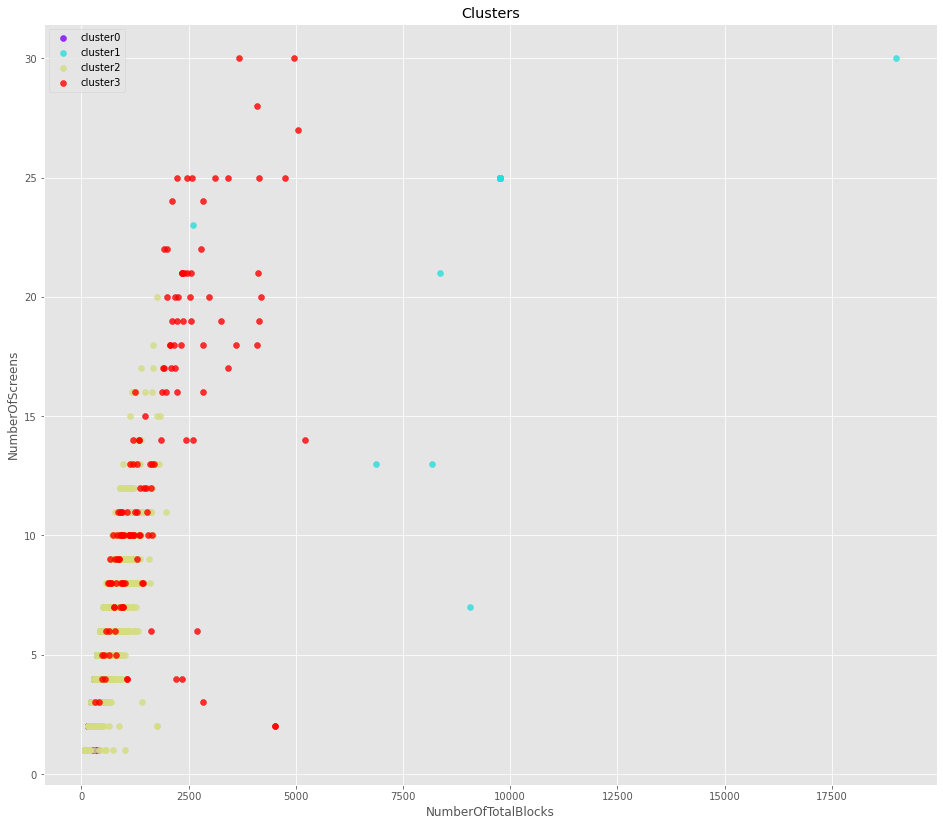

In [ ]:
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df2[df2.cluster_ == label]
    subset['NumberOfTotalBlocks'] = df.NumberOfTotalBlocks
    subset['NumberOfScreens'] = df.NumberOfScreens
    plt.scatter(subset.NumberOfTotalBlocks, subset.NumberOfScreens, c=color, label='cluster'+str(label),alpha=0.8)
plt.legend()
plt.title('Clusters')
plt.xlabel('NumberOfTotalBlocks')
plt.ylabel('NumberOfScreens')

In [ ]:
df2.groupby(['cluster_'])['cluster_'].count()

cluster_
0    207978
1        23
2      7104
3       139
Name: cluster_, dtype: int64

In [ ]:
agg_clusters = df2.groupby(['cluster_'])[features].mean()
agg_clusters

,F1,F2,F3,F4,F5,F6,F7,F8,F9
cluster_,,,,,,,,,
0,-15.223960,-0.993681,1.300565,-0.167863,-0.684891,-0.068684,-0.238606,-0.097154,-0.012452
1,12556.186628,560.695868,541.471879,-80.863197,-86.453680,-69.492476,-125.267581,38.273549,-5.735896
2,355.916528,31.323861,-42.002967,4.456136,20.336238,1.407013,6.888263,2.431455,0.366536
3,2510.974983,-206.884431,111.123862,36.801096,-0.272489,42.357675,25.695500,14.766064,0.846887


In [ ]:
clf = NearestCentroid()
clf.fit(X, preds)
clf.centroids_

for line in clf.centroids_:
    print(*line)

-15.223960384289365 -0.993680960062759 1.3005654751240647 -0.16786337414332111 -0.6848913007143249 -0.06868423278903464 -0.23860572316383657 -0.0971536958219167 -0.012451612134268479
12556.186627755907 560.6958681901002 541.4718791016301 -80.86319669232185 -86.45368040798392 -69.49247575390845 -125.26758077953525 38.27354935132971 -5.735896226083068
355.9165283905107 31.323861162502222 -42.002966847132534 4.456135974116348 20.336237831479952 1.407012868233539 6.888263093012234 2.4314550719014716 0.3665357117837904
2510.974983303502 -206.88443132987578 111.12386242692108 36.80109634087698 -0.27248896029111785 42.3576754921336 25.695499549189872 14.766063912106988 0.8468870874000837


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'NumberOfScreens')

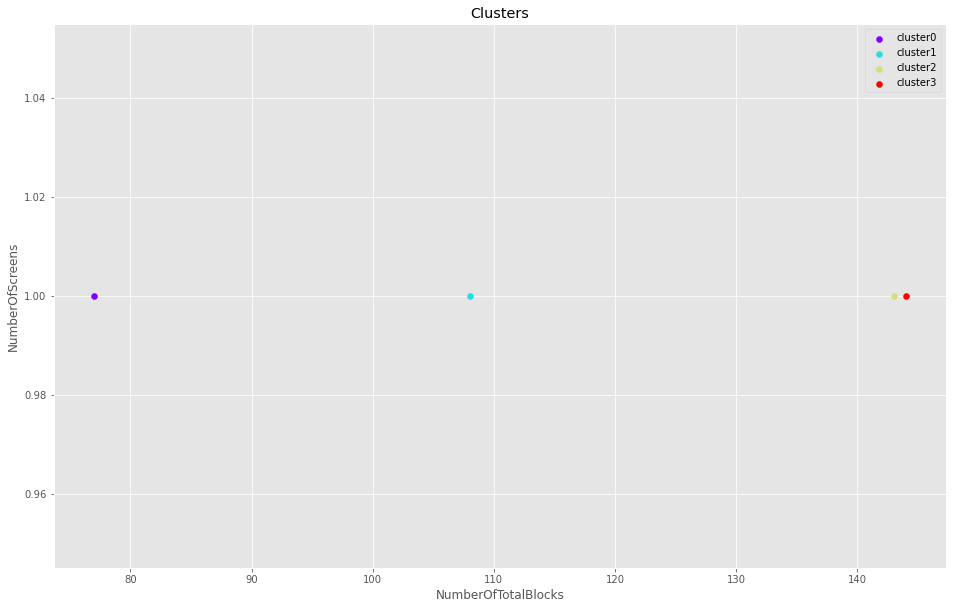

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_clusters.loc[(label,),]
    subset['NumberOfTotalBlocks'] = df.NumberOfTotalBlocks
    subset['NumberOfScreens'] = df.NumberOfScreens
    plt.scatter(subset.NumberOfTotalBlocks, subset.NumberOfScreens, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('NumberOfTotalBlocks')
plt.ylabel('NumberOfScreens')

**B) Test K=5**


---



In [ ]:
agglom = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
preds = agglom.fit_predict(X)

**Calculating Silhouette Score:**

In [ ]:
score = silhouette_score(X, preds)
print(score)

0.40498555083906024


**Calculating Davies-Bouldin (DB) Score:**

In [ ]:
score = davies_bouldin_score(X, agglom.labels_)
print(score)

0.8580741734757247


In [ ]:
df2['cluster_'] = agglom.labels_
df2.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,cluster_
0,-66.681473,-5.247599,-0.915378,-5.275020,-3.371432,-3.470835,8.906421,5.652796,-0.303031,1
1,197.019573,-229.797249,117.453258,-1.831047,-9.077095,0.011691,0.022596,-0.390824,-0.282029,1
2,69.143222,-61.245563,4.432303,-5.806328,33.582667,-13.033410,15.639763,-3.945578,-0.753100,1
3,10.020031,-5.849406,-28.920673,-4.937922,-5.650133,4.185753,-3.637978,-5.238883,0.090377,1
4,39.418703,-1.341220,-30.674591,-7.671310,-12.260127,-4.527750,-2.920438,35.024213,-0.546584,1


/tmp/ipykernel_348932/1771041908.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['NumberOfTotalBlocks'] = df.NumberOfTotalBlocks
/tmp/ipykernel_348932/1771041908.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['NumberOfScreens'] = df.NumberOfScreens
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a 

Text(0, 0.5, 'NumberOfScreens')

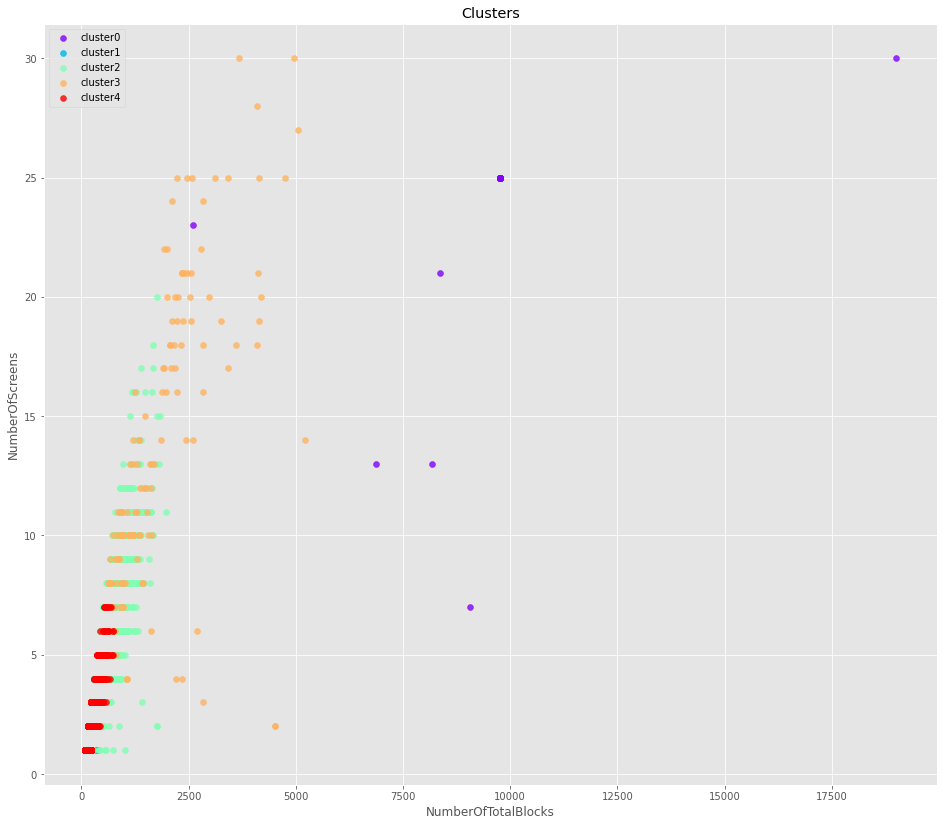

In [ ]:
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df2[df2.cluster_ == label]
    subset['NumberOfTotalBlocks'] = df.NumberOfTotalBlocks
    subset['NumberOfScreens'] = df.NumberOfScreens
    plt.scatter(subset.NumberOfTotalBlocks, subset.NumberOfScreens, c=color, label='cluster'+str(label),alpha=0.8)
plt.legend()
plt.title('Clusters')
plt.xlabel('NumberOfTotalBlocks')
plt.ylabel('NumberOfScreens')

In [ ]:
df2.groupby(['cluster_'])['cluster_'].count()

cluster_
0        23
1    181786
2      7104
3       139
4     26192
Name: cluster_, dtype: int64

In [ ]:
agg_clusters = df2.groupby(['cluster_'])[features].mean()
agg_clusters

,F1,F2,F3,F4,F5,F6,F7,F8,F9
cluster_,,,,,,,,,
0,12556.186628,560.695868,541.471879,-80.863197,-86.453680,-69.492476,-125.267581,38.273549,-5.735896
1,-16.134984,-14.744404,-7.610613,0.085505,-0.817142,-0.030809,-0.154958,0.338558,0.007776
2,355.916528,31.323861,-42.002967,4.456136,20.336238,1.407013,6.888263,2.431455,0.366536
3,2510.974983,-206.884431,111.123862,36.801096,-0.272489,42.357675,25.695500,14.766064,0.846887
4,-8.900988,94.443438,63.148741,-1.926372,0.232997,-0.331555,-0.819165,-3.121218,-0.152840


In [ ]:
clf = NearestCentroid()
clf.fit(X, preds)
clf.centroids_

for line in clf.centroids_:
    print(*line)

12556.186627755907 560.6958681901002 541.4718791016301 -80.86319669232185 -86.45368040798392 -69.49247575390845 -125.26758077953525 38.27354935132971 -5.735896226083068
-16.134983777961903 -14.744404388660216 -7.610612516972475 0.0855051314626277 -0.8171419937697154 -0.030809420163585576 -0.15495792874087613 0.33855796793099957 0.00777578118206031
355.9165283905107 31.323861162502222 -42.002966847132534 4.456135974116348 20.336237831479952 1.407012868233539 6.888263093012234 2.4314550719014716 0.3665357117837904
2510.974983303502 -206.88443132987578 111.12386242692108 36.80109634087698 -0.27248896029111785 42.3576754921336 25.695499549189872 14.766063912106988 0.8468870874000837
-8.900987772722388 94.44343759487077 63.14874058475017 -1.92637158886855 0.23299677533026442 -0.3315549829390751 -0.8191645944592729 -3.1212175514644755 -0.15284016289030533


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'NumberOfScreens')

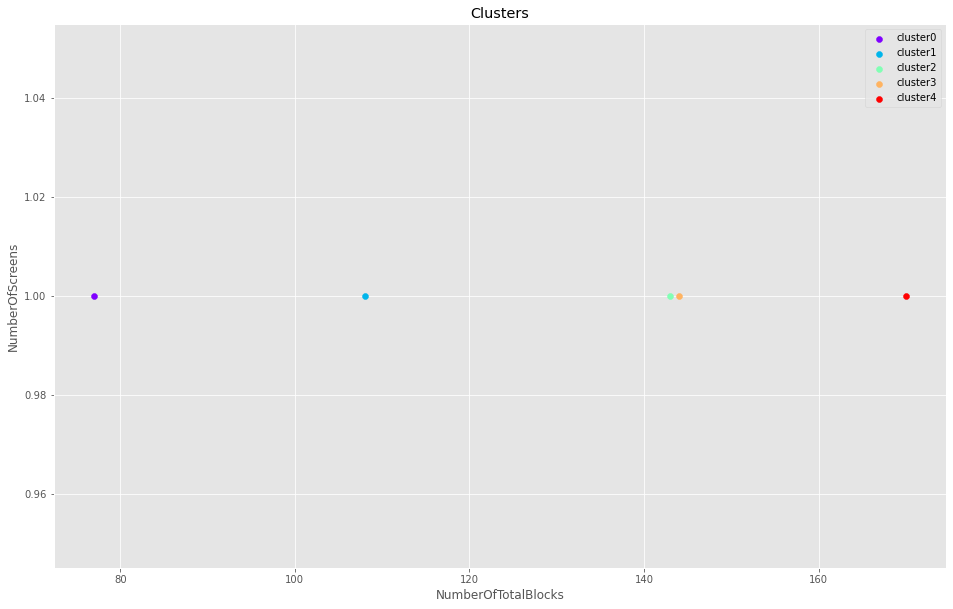

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_clusters.loc[(label,),]
    subset['NumberOfTotalBlocks'] = df.NumberOfTotalBlocks
    subset['NumberOfScreens'] = df.NumberOfScreens
    plt.scatter(subset.NumberOfTotalBlocks, subset.NumberOfScreens, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('NumberOfTotalBlocks')
plt.ylabel('NumberOfScreens')

**C) Test K=6**

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'ward')
preds = agglom.fit_predict(X)

**Calculating Silhouette Score:**

In [ ]:
score = silhouette_score(X, preds)
print(score)

0.40500765776513414


**Calculating Davies-Bouldin (DB) Score:**

In [ ]:
score = davies_bouldin_score(X, agglom.labels_)
print(score)

0.8457981256406765


In [ ]:
df2['cluster_'] = agglom.labels_
df2.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,cluster_
0,-66.681473,-5.247599,-0.915378,-5.275020,-3.371432,-3.470835,8.906421,5.652796,-0.303031,0
1,197.019573,-229.797249,117.453258,-1.831047,-9.077095,0.011691,0.022596,-0.390824,-0.282029,0
2,69.143222,-61.245563,4.432303,-5.806328,33.582667,-13.033410,15.639763,-3.945578,-0.753100,0
3,10.020031,-5.849406,-28.920673,-4.937922,-5.650133,4.185753,-3.637978,-5.238883,0.090377,0
4,39.418703,-1.341220,-30.674591,-7.671310,-12.260127,-4.527750,-2.920438,35.024213,-0.546584,0


/tmp/ipykernel_348932/1771041908.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['NumberOfTotalBlocks'] = df.NumberOfTotalBlocks
/tmp/ipykernel_348932/1771041908.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['NumberOfScreens'] = df.NumberOfScreens
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a 

Text(0, 0.5, 'NumberOfScreens')

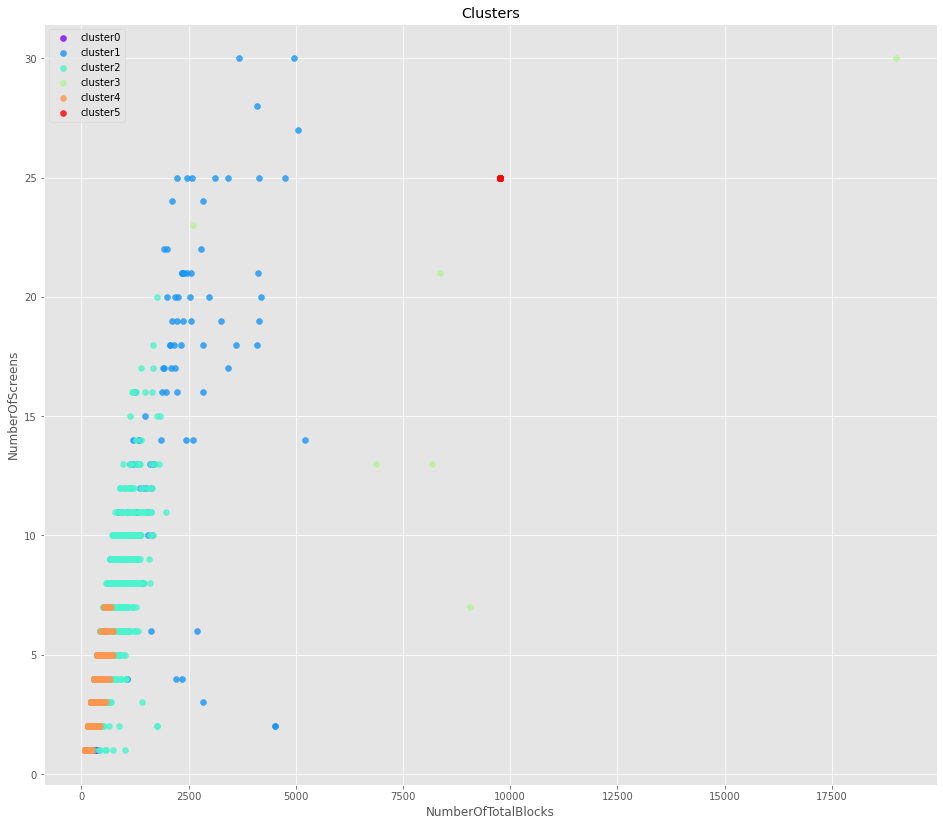

In [ ]:
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df2[df2.cluster_ == label]
    subset['NumberOfTotalBlocks'] = df.NumberOfTotalBlocks
    subset['NumberOfScreens'] = df.NumberOfScreens
    plt.scatter(subset.NumberOfTotalBlocks, subset.NumberOfScreens, c=color, label='cluster'+str(label),alpha=0.8)
plt.legend()
plt.title('Clusters')
plt.xlabel('NumberOfTotalBlocks')
plt.ylabel('NumberOfScreens')

In [ ]:
df2.groupby(['cluster_'])['cluster_'].count()

cluster_
0    181786
1       139
2      7104
3         6
4     26192
5        17
Name: cluster_, dtype: int64

In [ ]:
agg_clusters = df2.groupby(['cluster_'])[features].mean()
agg_clusters

,F1,F2,F3,F4,F5,F6,F7,F8,F9
cluster_,,,,,,,,,
0,-16.134984,-14.744404,-7.610613,0.085505,-0.817142,-0.030809,-0.154958,0.338558,0.007776
1,2510.974983,-206.884431,111.123862,36.801096,-0.272489,42.357675,25.695500,14.766064,0.846887
2,355.916528,31.323861,-42.002967,4.456136,20.336238,1.407013,6.888263,2.431455,0.366536
3,8177.421944,5695.087198,687.438526,13.827691,-125.552253,201.269612,21.907730,493.215644,-3.571186
4,-8.900988,94.443438,63.148741,-1.926372,0.232997,-0.331555,-0.819165,-3.121218,-0.152840
5,14101.632987,-1251.442248,489.954239,-114.283510,-72.654184,-165.055565,-177.211808,-122.294249,-6.499911


In [ ]:
clf = NearestCentroid()
clf.fit(X, preds)
clf.centroids_

for line in clf.centroids_:
    print(*line)

-16.134983777961903 -14.744404388660216 -7.610612516972475 0.0855051314626277 -0.8171419937697154 -0.030809420163585576 -0.15495792874087613 0.33855796793099957 0.00777578118206031
2510.974983303502 -206.88443132987578 111.12386242692108 36.80109634087698 -0.27248896029111785 42.3576754921336 25.695499549189872 14.766063912106988 0.8468870874000837
355.9165283905107 31.323861162502222 -42.002966847132534 4.456135974116348 20.336237831479952 1.407012868233539 6.888263093012234 2.4314550719014716 0.3665357117837904
8177.421944118311 5695.0871983421575 687.4385262581615 13.827690723363943 -125.55225285741896 201.2696117648361 21.90772985731014 493.2156436480318 -3.571186308302148
-8.900987772722388 94.44343759487077 63.14874058475017 -1.92637158886855 0.23299677533026442 -0.3315549829390751 -0.8191645944592729 -3.1212175514644755 -0.15284016289030533
14101.632986686825 -1251.4422483341555 489.95423892873686 -114.28350989785802 -72.65418424935977 -165.05556546640656 -177.21180806312773 -12

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'NumberOfScreens')

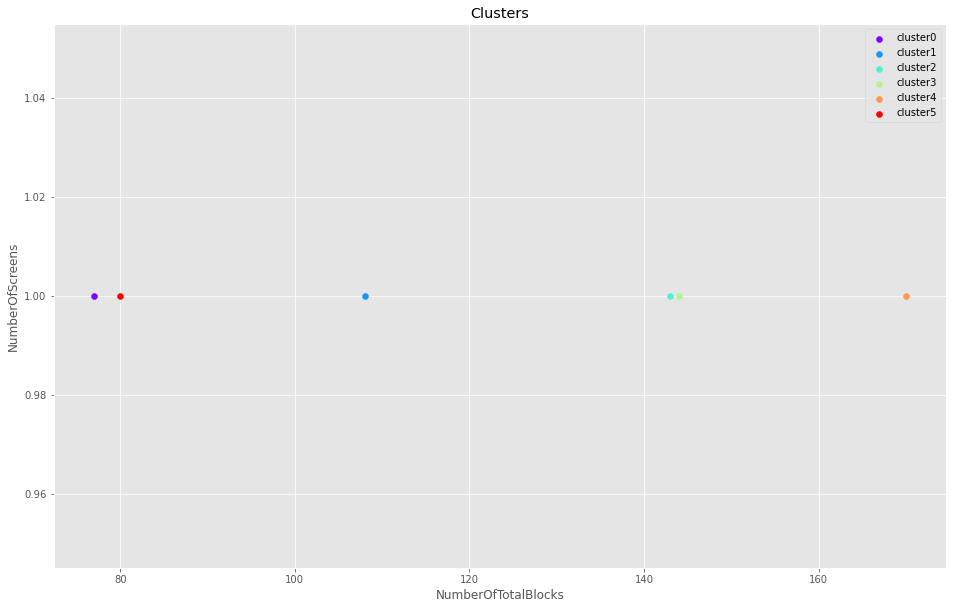

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_clusters.loc[(label,),]
    subset['NumberOfTotalBlocks'] = df.NumberOfTotalBlocks
    subset['NumberOfScreens'] = df.NumberOfScreens
    plt.scatter(subset.NumberOfTotalBlocks, subset.NumberOfScreens, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('NumberOfTotalBlocks')
plt.ylabel('NumberOfScreens')

**D) Test K=3**

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
preds = agglom.fit_predict(X)

**Calculating Silhouette Score:**

In [ ]:
score = silhouette_score(X, preds)
print(score)

0.7505407448139487


**Calculating Davies-Bouldin (DB) Score:**

In [ ]:
score = davies_bouldin_score(X, agglom.labels_)
print(score)

0.7191953720687255


In [ ]:
df2['cluster_'] = agglom.labels_
df2.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,cluster_
0,-66.681473,-5.247599,-0.915378,-5.275020,-3.371432,-3.470835,8.906421,5.652796,-0.303031,2
1,197.019573,-229.797249,117.453258,-1.831047,-9.077095,0.011691,0.022596,-0.390824,-0.282029,2
2,69.143222,-61.245563,4.432303,-5.806328,33.582667,-13.033410,15.639763,-3.945578,-0.753100,2
3,10.020031,-5.849406,-28.920673,-4.937922,-5.650133,4.185753,-3.637978,-5.238883,0.090377,2
4,39.418703,-1.341220,-30.674591,-7.671310,-12.260127,-4.527750,-2.920438,35.024213,-0.546584,2


/tmp/ipykernel_348932/1771041908.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['NumberOfTotalBlocks'] = df.NumberOfTotalBlocks
/tmp/ipykernel_348932/1771041908.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['NumberOfScreens'] = df.NumberOfScreens
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a 

Text(0, 0.5, 'NumberOfScreens')

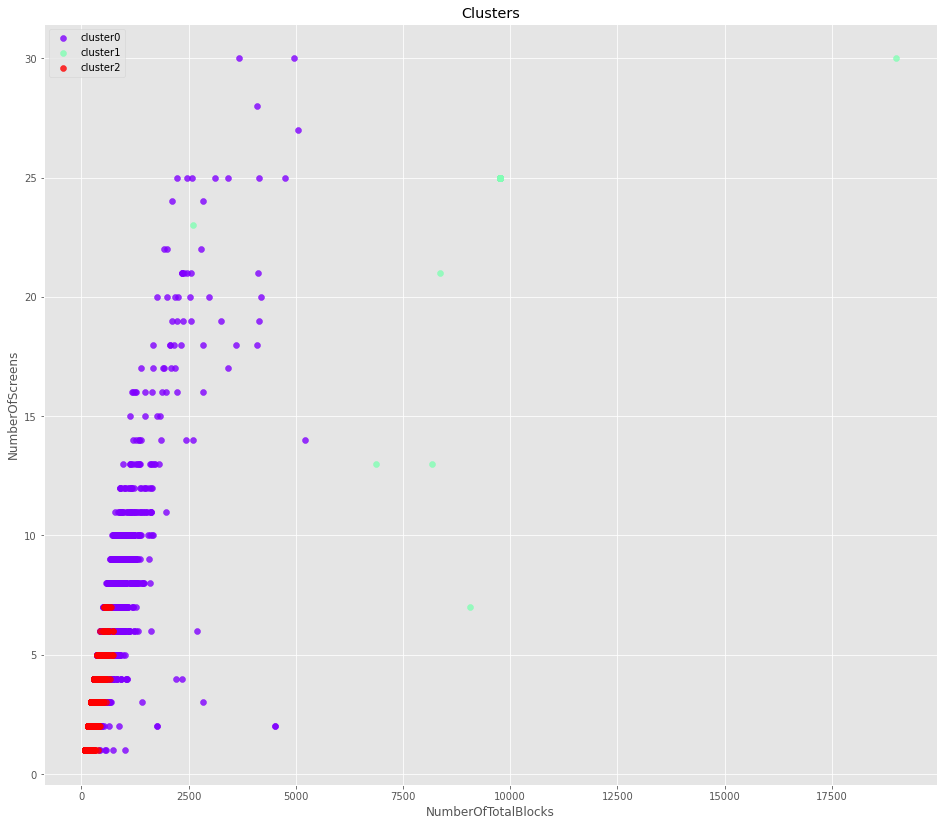

In [ ]:
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df2[df2.cluster_ == label]
    subset['NumberOfTotalBlocks'] = df.NumberOfTotalBlocks
    subset['NumberOfScreens'] = df.NumberOfScreens
    plt.scatter(subset.NumberOfTotalBlocks, subset.NumberOfScreens, c=color, label='cluster'+str(label),alpha=0.8)
plt.legend()
plt.title('Clusters')
plt.xlabel('NumberOfTotalBlocks')
plt.ylabel('NumberOfScreens')

In [ ]:
df2.groupby(['cluster_'])['cluster_'].count()

cluster_
0      7243
1        23
2    207978
Name: cluster_, dtype: int64

In [ ]:
agg_clusters = df2.groupby(['cluster_'])[features].mean()
agg_clusters

,F1,F2,F3,F4,F5,F6,F7,F8,F9
cluster_,,,,,,,,,
0,397.274132,26.752419,-39.064319,5.076866,19.940737,2.192895,7.249192,2.668168,0.375754
1,12556.186628,560.695868,541.471879,-80.863197,-86.453680,-69.492476,-125.267581,38.273549,-5.735896
2,-15.223960,-0.993681,1.300565,-0.167863,-0.684891,-0.068684,-0.238606,-0.097154,-0.012452


In [ ]:
clf = NearestCentroid()
clf.fit(X, preds)
clf.centroids_

for line in clf.centroids_:
    print(*line)

397.27413231608165 26.752419404054088 -39.064318597913356 5.076866264186735 19.940736930740464 2.192894699618612 7.24919169544336 2.6681678468274113 0.37575410764333256
12556.186627755907 560.6958681901002 541.4718791016301 -80.86319669232185 -86.45368040798392 -69.49247575390845 -125.26758077953525 38.27354935132971 -5.735896226083068
-15.223960384289365 -0.993680960062759 1.3005654751240647 -0.16786337414332111 -0.6848913007143249 -0.06868423278903464 -0.23860572316383657 -0.0971536958219167 -0.012451612134268479


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'NumberOfScreens')

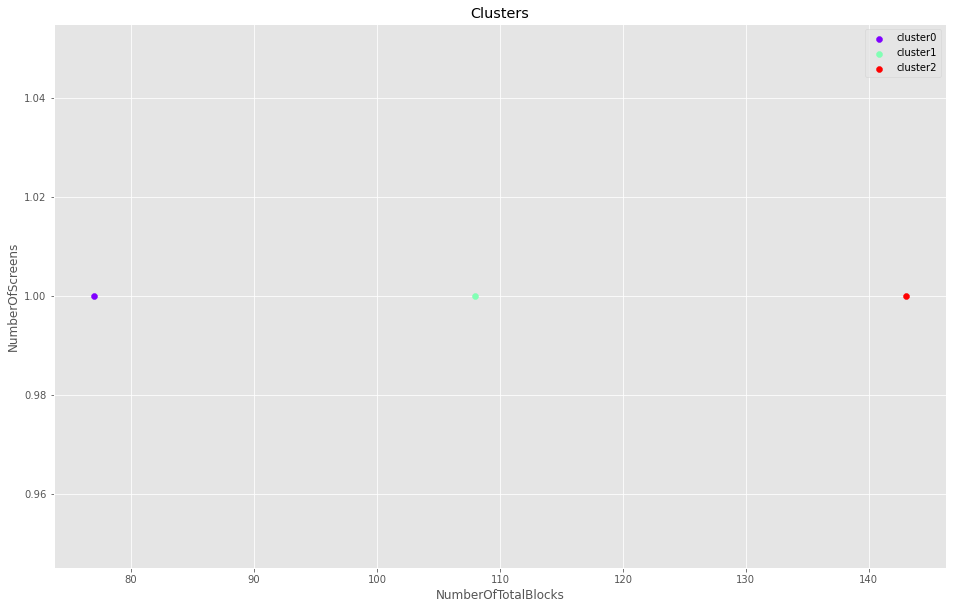

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_clusters.loc[(label,),]
    subset['NumberOfTotalBlocks'] = df.NumberOfTotalBlocks
    subset['NumberOfScreens'] = df.NumberOfScreens
    plt.scatter(subset.NumberOfTotalBlocks, subset.NumberOfScreens, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('NumberOfTotalBlocks')
plt.ylabel('NumberOfScreens')